# Phase 5 Capstone

# Predicting Obesity/ Obesity Prediction

- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones

## Business Understanding 

## Data Understanding 

## Data Preparation

## Modeling

## Evaluation

## Deployment

In [7]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 
import zipfile

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing packages for statistics
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from scipy.stats import kstest

import os

In [8]:
# Function to load dataset 

def load_csv_from_zip(zip_file_path, csv_file_name):
    
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Check if the CSV file exists in the zip file
        if csv_file_name in zip_ref.namelist():
            # Read the CSV file directly into a DataFrame
            with zip_ref.open(csv_file_name) as csv_file:
                df = pd.read_csv(csv_file)
                return df
        else:
            print(f"CSV file '{csv_file_name}' not found in the zip file.")
            return None

zip_file_path = "data/brfss2022.csv.zip"
csv_file_name = "brfss2022.csv"
df = load_csv_from_zip(zip_file_path, csv_file_name)
if df is not None:
    print("CSV file loaded successfully!")
    print(df.head())  # Display the first few rows of the DataFrame

CSV file loaded successfully!
   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  2032022       2     3   2022    1100.0  2022000001   
1     1.0     1.0  2042022       2     4   2022    1100.0  2022000002   
2     1.0     1.0  2022022       2     2   2022    1100.0  2022000003   
3     1.0     1.0  2032022       2     3   2022    1100.0  2022000004   
4     1.0     1.0  2022022       2     2   2022    1100.0  2022000005   

           _PSU  CTELENM1  ...  _SMOKGRP  _LCSREC  DRNKANY6      DROCDY4_  \
0  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
1  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
2  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
3  2.022000e+09       1.0  ...       3.0      2.0       2.0  5.397605e-79   
4  2.022000e+09       1.0  ...       4.0      NaN       1.0  1.000000e+01   

   _RFBING6      _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  


In [9]:
# Previewing df shape
df.shape

(445132, 326)

In [10]:
# Previewing general information on dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Columns: 326 entries, _STATE to _AIDTST4
dtypes: float64(321), int64(5)
memory usage: 1.1 GB
None


Looking at the initial dataset information, this dataset contains 445132 entries with a total of 326 columns with datatypes being integers and floats. While there are some numerical columns, a good amount of the columns are categoricla/numerical. The many columns represent  various health-related risk behaviors, chronic health conditions, demographics, location, and even the use of preventive services along with other variables. 

In [11]:
#Previewing first 10 rows 
df.head(10)


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,2032022,2,3,2022,1100.0,2022000001,2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0
1,1.0,1.0,2042022,2,4,2022,1100.0,2022000002,2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0
2,1.0,1.0,2022022,2,2,2022,1100.0,2022000003,2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0
3,1.0,1.0,2032022,2,3,2022,1100.0,2022000004,2.022000e+09,1.0,...,3.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,9.0,9.0,2.0
4,1.0,1.0,2022022,2,2,2022,1100.0,2022000005,2.022000e+09,1.0,...,4.0,NaN,1.0,1.000000e+01,1.0,1.400000e+02,1.0,NaN,NaN,2.0
5,1.0,1.0,2112022,2,11,2022,1100.0,2022000006,2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,1.0,2.0
6,1.0,1.0,2032022,2,3,2022,1100.0,2022000007,2.022000e+09,1.0,...,3.0,NaN,1.0,1.700000e+01,1.0,2.330000e+02,1.0,2.0,2.0,2.0
7,1.0,1.0,2092022,2,9,2022,1100.0,2022000008,2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0
8,1.0,1.0,2022022,2,2,2022,1100.0,2022000009,2.022000e+09,1.0,...,3.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,1.0
9,1.0,1.0,2072022,2,7,2022,1100.0,2022000010,2.022000e+09,1.0,...,4.0,NaN,1.0,3.000000e+00,1.0,2.300000e+01,1.0,1.0,1.0,9.0


In [12]:
#Previewing first 10 rows 
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
_STATE,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.0
FMONTH,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.0
IDATE,2.032022e+06,2.042022e+06,2.022022e+06,2.032022e+06,2022022.0,2.112022e+06,2032022.0,2.092022e+06,2.022022e+06,2072022.0
IMONTH,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.0,2.000000e+00,2.0,2.000000e+00,2.000000e+00,2.0
IDAY,3.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,2.0,1.100000e+01,3.0,9.000000e+00,2.000000e+00,7.0
...,...,...,...,...,...,...,...,...,...,...
_DRNKWK2,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,140.0,5.397605e-79,233.0,5.397605e-79,5.397605e-79,23.0
_RFDRHV8,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.0
_FLSHOT7,1.000000e+00,2.000000e+00,NaN,9.000000e+00,NaN,2.000000e+00,2.0,1.000000e+00,2.000000e+00,1.0
_PNEUMO3,2.000000e+00,2.000000e+00,NaN,9.000000e+00,NaN,1.000000e+00,2.0,1.000000e+00,2.000000e+00,1.0


In [13]:
# Previewing columns 
print(df.columns)

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_SMOKGRP', '_LCSREC', 'DRNKANY6', 'DROCDY4_', '_RFBING6', '_DRNKWK2',
       '_RFDRHV8', '_FLSHOT7', '_PNEUMO3', '_AIDTST4'],
      dtype='object', length=326)


In [14]:
#Looping to get all column names and data types
for col in df.columns:
    print(f"Column: {col}, Data Type: {df[col].dtype}")

Column: _STATE, Data Type: float64
Column: FMONTH, Data Type: float64
Column: IDATE, Data Type: int64
Column: IMONTH, Data Type: int64
Column: IDAY, Data Type: int64
Column: IYEAR, Data Type: int64
Column: DISPCODE, Data Type: float64
Column: SEQNO, Data Type: int64
Column: _PSU, Data Type: float64
Column: CTELENM1, Data Type: float64
Column: PVTRESD1, Data Type: float64
Column: COLGHOUS, Data Type: float64
Column: STATERE1, Data Type: float64
Column: CELPHON1, Data Type: float64
Column: LADULT1, Data Type: float64
Column: COLGSEX1, Data Type: float64
Column: NUMADULT, Data Type: float64
Column: LANDSEX1, Data Type: float64
Column: NUMMEN, Data Type: float64
Column: NUMWOMEN, Data Type: float64
Column: RESPSLCT, Data Type: float64
Column: SAFETIME, Data Type: float64
Column: CTELNUM1, Data Type: float64
Column: CELLFON5, Data Type: float64
Column: CADULT1, Data Type: float64
Column: CELLSEX1, Data Type: float64
Column: PVTRESD3, Data Type: float64
Column: CCLGHOUS, Data Type: float64
C

In [15]:
#Inspecting unique values and value counts for all variables
for col in df:
    print(f"{col} - unique values: ")
    print(df[col].unique(), "\n")
    print("------------------------------------")

_STATE - unique values: 
[ 1.  2.  4.  5.  6.  8.  9. 10. 11. 12. 13. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
 40. 41. 42. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55. 56. 66. 72. 78.] 

------------------------------------
FMONTH - unique values: 
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.] 

------------------------------------
IDATE - unique values: 
[ 2032022  2042022  2022022  2112022  2092022  2072022  2102022  2182022
  2162022  2152022  2242022  2172022  3142022  3032022  3082022  3112022
  3102022  3092022  2142022  2212022  2082022  2232022  2222022  2252022
  3152022  3022022  3072022  2052022  3162022  3042022  3172022  2132022
  3182022  4192022  4202022  4182022  4222022  4272022  4282022  4262022
  5022022  5122022  5042022  5102022  5172022  5262022  5232022  6012022
  6302022  6242022  6232022  6212022  6172022  6162022  6152022  5032022
  5252022  6282022  5312022  4252022  5052022  6272022  6222022  42

In [16]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Print the full samples
print(df.sample(1))

        _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
265094    36.0     6.0  6132022       6    13   2022    1100.0  2022006584   

                _PSU  CTELENM1  PVTRESD1  COLGHOUS  STATERE1  CELPHON1  \
265094  2.022007e+09       NaN       NaN       NaN       NaN       NaN   

        LADULT1  COLGSEX1  NUMADULT  LANDSEX1  NUMMEN  NUMWOMEN  RESPSLCT  \
265094      NaN       NaN       NaN       NaN     NaN       NaN       NaN   

        SAFETIME  CTELNUM1  CELLFON5  CADULT1  CELLSEX1  PVTRESD3  CCLGHOUS  \
265094       1.0       1.0       1.0      1.0       1.0       1.0       NaN   

        CSTATE1  LANDLINE  HHADULT  SEXVAR  GENHLTH  PHYSHLTH  MENTHLTH  \
265094      1.0       2.0      2.0     1.0      2.0      88.0      88.0   

        POORHLTH  PRIMINSR  PERSDOC3  MEDCOST1  CHECKUP1  EXERANY2  SLEPTIM1  \
265094       NaN       1.0       1.0       2.0       3.0       1.0       7.0   

        LASTDEN4  RMVTETH4  CVDINFR4  CVDCRHD4  CVDSTRK3  ASTHMA3  A

In [17]:
# Checking for null values
df.isna().sum()

_STATE           0
FMONTH           0
IDATE            0
IMONTH           0
IDAY             0
             ...  
_DRNKWK2         0
_RFDRHV8         0
_FLSHOT7    276713
_PNEUMO3    276713
_AIDTST4     46235
Length: 326, dtype: int64

In [18]:
# Checking null values for columns

na_values = pd.DataFrame(df.isna().sum(), columns=['Total Values null'])
na_values['%_weight'] = na_values['Total Values null'].apply(lambda x: x/df.shape[0]*100)
na_values

,Total Values null,%_weight
_STATE,0,0.000000
FMONTH,0,0.000000
IDATE,0,0.000000
IMONTH,0,0.000000
IDAY,0,0.000000
...,...,...
_DRNKWK2,0,0.000000
_RFDRHV8,0,0.000000
_FLSHOT7,276713,62.164257
_PNEUMO3,276713,62.164257


In [19]:
na_over_half = na_values[na_values["%_weight"] > 50]
na_over_half

,Total Values null,%_weight
CTELENM1,349081,78.421906
PVTRESD1,349082,78.422131
COLGHOUS,445113,99.995732
STATERE1,349082,78.422131
CELPHON1,349080,78.421682
...,...,...
_PACKYRS,302267,67.905026
_YRSQUIT,338802,76.112704
_LCSREC,393679,88.440957
_FLSHOT7,276713,62.164257


In [20]:
# Columns with greater than 50% na values 
na_over_half.index.values

array(['CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1',
       'LADULT1', 'COLGSEX1', 'NUMADULT', 'LANDSEX1', 'NUMMEN',
       'NUMWOMEN', 'RESPSLCT', 'CCLGHOUS', 'ASTHNOW', 'DIABAGE4',
       'NUMHHOL4', 'NUMPHON4', 'PREGNANT', 'HADMAM', 'HOWLONG',
       'CERVSCRN', 'CRVCLCNC', 'CRVCLPAP', 'CRVCLHPV', 'HADHYST2',
       'COLNSIGM', 'COLNTES1', 'SIGMTES1', 'LASTSIG4', 'VIRCOLO1',
       'VCLNTES2', 'SMALSTOL', 'STOLTEST', 'STOOLDN2', 'BLDSTFIT',
       'SDNATES1', 'SMOKDAY2', 'LCSFIRST', 'LCSLAST', 'LCSNUMCG',
       'LCSSCNCR', 'LCSCTWHN', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS',
       'FLSHTMY3', 'HIVTSTD3', 'COVIDSMP', 'COVIDPRM', 'PDIABTS1',
       'PREDIAB2', 'DIABTYPE', 'INSULIN1', 'CHKHEMO3', 'EYEEXAM1',
       'DIABEYE1', 'DIABEDU1', 'FEETSORE', 'TOLDCFS', 'HAVECFS',
       'WORKCFS', 'IMFVPLA3', 'HPVADVC4', 'HPVADSHT', 'SHINGLE2',
       'COVIDVA1', 'COVIDNU1', 'COVIDFS1', 'COVIDSE1', 'COPDCOGH',
       'COPDFLEM', 'COPDBRTH', 'COPDBTST', 'COPDSMOK', 'CNCRDIFF',
      

In [21]:
na_over_half.T

,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,COLGSEX1,NUMADULT,LANDSEX1,NUMMEN,NUMWOMEN,RESPSLCT,CCLGHOUS,ASTHNOW,DIABAGE4,NUMHHOL4,NUMPHON4,PREGNANT,HADMAM,HOWLONG,CERVSCRN,CRVCLCNC,CRVCLPAP,CRVCLHPV,HADHYST2,COLNSIGM,COLNTES1,SIGMTES1,LASTSIG4,VIRCOLO1,VCLNTES2,SMALSTOL,STOLTEST,STOOLDN2,BLDSTFIT,SDNATES1,SMOKDAY2,LCSFIRST,LCSLAST,LCSNUMCG,LCSSCNCR,LCSCTWHN,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLSHTMY3,HIVTSTD3,COVIDSMP,COVIDPRM,PDIABTS1,PREDIAB2,DIABTYPE,INSULIN1,CHKHEMO3,EYEEXAM1,DIABEYE1,DIABEDU1,FEETSORE,TOLDCFS,HAVECFS,WORKCFS,IMFVPLA3,HPVADVC4,HPVADSHT,SHINGLE2,COVIDVA1,COVIDNU1,COVIDFS1,COVIDSE1,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,CNCRDIFF,CNCRAGE,CNCRTYP2,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PSATEST1,PSATIME1,PCPSARS2,PSASUGST,PCSTALK1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,MARIJAN1,MARJSMOK,MARJEAT,MARJVAPE,MARJDAB,MARJOTHR,USEMRJN4,LASTSMK2,STOPSMK2,MENTCIGS,MENTECIG,HEATTBCO,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,FIREARM5,GUNLOAD,LOADULK2,RCSGEND1,RCSXBRTH,RCSRLTN2,CASTHDX2,CASTHNO2,BIRTHSEX,SOMALE,SOFEMALE,HADSEX,PFPPRVN4,TYPCNTR9,BRTHCNT4,WHEREGET,NOBCUSE8,BCPREFER,RRCLASS3,RRCOGNT2,RRTREAT,RRATWRK2,RRHCARE4,RRPHYSM2,MSCODE,_CRACE2,_CPRACE2,CAGEG,_CLLCPWT,_DUALCOR,_ALTETH3,_RFMAM22,_MAM5023,_CLNSCP1,_SGMSCP1,_SGMS101,_RFBLDS5,_STOLDN1,_VIRCOL1,_YRSSMOK,_PACKDAY,_PACKYRS,_YRSQUIT,_LCSREC,_FLSHOT7,_PNEUMO3
Total Values null,349081.000000,349082.000000,445113.000000,349082.000000,349080.000000,349082.000000,445111.000000,349100.000000,401436.000000,394702.000000,394699.000000,392879.000000,443807.000000,378438.000000,383973.00000,349083.000000,438189.000000,366114.000000,223319.000000,274020.000000,224318.000000,309555.000000,309745.000000,309960.000000,227453.000000,232309.000000,237848.000000,413769.000000,441658.000000,383265.000000,436153.000000,383456.000000,395758.000000,383730.000000,433738.00000,433770.000000,281079.00000,283417.000000,324513.000000,288992.000000,279557.000000,413627.000000,234769.000000,235283.000000,235721.000000,236258.000000,316269.00000,320933.000000,418417.000000,304884.000000,304910.000000,432532.000000,432532.000000,432532.000000,432532.000000,432532.000000,432532.000000,432532.000000,445132.0,445132.0,445132.0,436089.000000,437786.000000,443460.000000,430395.000000,292089.000000,320385.000000,321193.000000,328043.000000,437863.000000,437870.000000,437883.000000,437900.000000,437917.000000,421733.000000,422567.000000,422588.000000,427830.000000,435325.000000,435349.000000,435361.000000,437882.00000,435384.000000,435392.000000,435403.000000,428035.000000,443591.000000,437952.000000,441186.000000,441196.000000,440738.000000,438364.000000,380457.000000,437679.000000,437701.000000,443199.000000,437717.000000,437732.000000,346622.000000,425498.000000,425549.000000,425599.000000,425660.000000,427832.000000,425732.000000,425772.000000,366598.000000,396846.000000,396901.000000,396912.000000,396938.000000,396960.000000,397003.000000,397055.000000,397103.000000,397160.000000,397196.00000,397256.000000,397311.000000,397375.000000,350213.000000,433622.00000,433628.000000,433629.000000,433637.00000,433645.000000,440126.00000,397723.000000,426243.00000,440138.000000,442968.000000,430103.000000,384190.00000,384292.000000,384404.000000,385687.000000,398512.000000,405332.000000,431307.00000,441077.000000,386144.000000,441669.000000,386658.000000,394471.000000,439804.000000,365705.000000,321100.000000,305502.000000,425256.000000,430451.000000,433762.000000,433791.000000,435358.000000,441970.000000,430605.000000,283394.00000,283788.000000,284167.000000,362095.000000,284624.000000,284942.000000,351246.000000,384286.000000,385142.000000,394956.000000,385986.000000,287103.000000,276713.000000,263892.000000,342456.000000,223180.000000

In [22]:
print(df.sample(1))

        _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
402021    53.0     6.0  6252022       6    25   2022    1100.0  2022012747   

                _PSU  CTELENM1  PVTRESD1  COLGHOUS  STATERE1  CELPHON1  \
402021  2.022013e+09       NaN       NaN       NaN       NaN       NaN   

        LADULT1  COLGSEX1  NUMADULT  LANDSEX1  NUMMEN  NUMWOMEN  RESPSLCT  \
402021      NaN       NaN       NaN       NaN     NaN       NaN       NaN   

        SAFETIME  CTELNUM1  CELLFON5  CADULT1  CELLSEX1  PVTRESD3  CCLGHOUS  \
402021       1.0       1.0       1.0      1.0       1.0       1.0       NaN   

        CSTATE1  LANDLINE  HHADULT  SEXVAR  GENHLTH  PHYSHLTH  MENTHLTH  \
402021      1.0       1.0      1.0     1.0      1.0      88.0      88.0   

        POORHLTH  PRIMINSR  PERSDOC3  MEDCOST1  CHECKUP1  EXERANY2  SLEPTIM1  \
402021       NaN       1.0       2.0       2.0       1.0       1.0       8.0   

        LASTDEN4  RMVTETH4  CVDINFR4  CVDCRHD4  CVDSTRK3  ASTHMA3  A

In [23]:
#Looping to get all column names and unique values
for col in df.columns:
    print(f"Column: {col}, Unique value: {df[col].unique}")

Column: _STATE, Unique value: <bound method Series.unique of 0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
445127    78.0
445128    78.0
445129    78.0
445130    78.0
445131    78.0
Name: _STATE, Length: 445132, dtype: float64>
Column: FMONTH, Unique value: <bound method Series.unique of 0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
445127    11.0
445128    11.0
445129    11.0
445130    11.0
445131    11.0
Name: FMONTH, Length: 445132, dtype: float64>
Column: IDATE, Unique value: <bound method Series.unique of 0          2032022
1          2042022
2          2022022
3          2032022
4          2022022
            ...   
445127    12192022
445128    12212022
445129    11292022
445130    12082022
445131    12142022
Name: IDATE, Length: 445132, dtype: int64>
Column: IMONTH, Unique value: <bound method Series.unique of 0          2
1          2
2          2
3          2
4          2
          ..
44512

In [24]:
#Looping to get all column names
for col in df.columns:
    print(f"{col} ")
    print(" ")

_STATE 
 
FMONTH 
 
IDATE 
 
IMONTH 
 
IDAY 
 
IYEAR 
 
DISPCODE 
 
SEQNO 
 
_PSU 
 
CTELENM1 
 
PVTRESD1 
 
COLGHOUS 
 
STATERE1 
 
CELPHON1 
 
LADULT1 
 
COLGSEX1 
 
NUMADULT 
 
LANDSEX1 
 
NUMMEN 
 
NUMWOMEN 
 
RESPSLCT 
 
SAFETIME 
 
CTELNUM1 
 
CELLFON5 
 
CADULT1 
 
CELLSEX1 
 
PVTRESD3 
 
CCLGHOUS 
 
CSTATE1 
 
LANDLINE 
 
HHADULT 
 
SEXVAR 
 
GENHLTH 
 
PHYSHLTH 
 
MENTHLTH 
 
POORHLTH 
 
PRIMINSR 
 
PERSDOC3 
 
MEDCOST1 
 
CHECKUP1 
 
EXERANY2 
 
SLEPTIM1 
 
LASTDEN4 
 
RMVTETH4 
 
CVDINFR4 
 
CVDCRHD4 
 
CVDSTRK3 
 
ASTHMA3 
 
ASTHNOW 
 
CHCSCNC1 
 
CHCOCNC1 
 
CHCCOPD3 
 
ADDEPEV3 
 
CHCKDNY2 
 
HAVARTH4 
 
DIABETE4 
 
DIABAGE4 
 
MARITAL 
 
EDUCA 
 
RENTHOM1 
 
NUMHHOL4 
 
NUMPHON4 
 
CPDEMO1C 
 
VETERAN3 
 
EMPLOY1 
 
CHILDREN 
 
INCOME3 
 
PREGNANT 
 
WEIGHT2 
 
HEIGHT3 
 
DEAF 
 
BLIND 
 
DECIDE 
 
DIFFWALK 
 
DIFFDRES 
 
DIFFALON 
 
HADMAM 
 
HOWLONG 
 
CERVSCRN 
 
CRVCLCNC 
 
CRVCLPAP 
 
CRVCLHPV 
 
HADHYST2 
 
HADSIGM4 
 
COLNSIGM 
 
COLNTES1 
 
SIGMTES1 
 
LASTSIG4 


_STATE 
 
FMONTH 
 
IDATE 
 
IMONTH 
 
IDAY 
 
IYEAR 
 
DISPCODE 
 
SEQNO 
 
_PSU 
 
CTELENM1 
 
PVTRESD1 
 
COLGHOUS 
 
STATERE1 
 
CELPHON1 
 
LADULT1 
 
COLGSEX1 
 
NUMADULT 
 
LANDSEX1 
 
NUMMEN 
 
NUMWOMEN 
 
RESPSLCT 
 
SAFETIME 
 
CTELNUM1 
 
CELLFON5 
 
CADULT1 
 
CELLSEX1 
 
PVTRESD3 
 
CCLGHOUS 
 
CSTATE1 
 
LANDLINE 
 
HHADULT 
 
SEXVAR 
 
GENHLTH 
 
PHYSHLTH 
 
MENTHLTH 
 
POORHLTH 
 
PRIMINSR 
 
PERSDOC3 
 
MEDCOST1 
 
CHECKUP1 
 
EXERANY2 
 
SLEPTIM1 
 
LASTDEN4 
 
RMVTETH4 
 
CVDINFR4 
 
CVDCRHD4 
 
CVDSTRK3 
 
ASTHMA3 
 
ASTHNOW 
 
CHCSCNC1 
 
CHCOCNC1 
 
CHCCOPD3 
 
ADDEPEV3 
 
CHCKDNY2 
 
HAVARTH4 
 
DIABETE4 
 
DIABAGE4 
 
MARITAL 
 
EDUCA 
 
RENTHOM1 
 
NUMHHOL4 
 
NUMPHON4 
 
CPDEMO1C 
 
VETERAN3 
 
EMPLOY1 
 
CHILDREN 
 
INCOME3 
 
PREGNANT 
 
WEIGHT2 
 
HEIGHT3 
 
DEAF 
 
BLIND 
 
DECIDE 
 
DIFFWALK 
 
DIFFDRES 
 
DIFFALON 
 
HADMAM 
 
HOWLONG 
 
CERVSCRN 
 
CRVCLCNC 
 
CRVCLPAP 
 
CRVCLHPV 
 
HADHYST2 
 
HADSIGM4 
 
COLNSIGM 
 
COLNTES1 
 
SIGMTES1 
 
LASTSIG4 
 
COLNCNCR 
 
VIRCOLO1 
 
VCLNTES2 
 
SMALSTOL 
 
STOLTEST 
 
STOOLDN2 
 
BLDSTFIT 
 
SDNATES1 
 
SMOKE100 
 
SMOKDAY2 
 
USENOW3 
 
ECIGNOW2 
 
LCSFIRST 
 
LCSLAST 
 
LCSNUMCG 
 
LCSCTSC1 
 
LCSSCNCR 
 
LCSCTWHN 
 
ALCDAY4 
 
AVEDRNK3 
 
DRNK3GE5 
 
MAXDRNKS 
 
FLUSHOT7 
 
FLSHTMY3 
 
PNEUVAC4 
 
TETANUS1 
 
HIVTST7 
 
HIVTSTD3 
 
HIVRISK5 
 
COVIDPOS 
 
COVIDSMP 
 
COVIDPRM 
 
PDIABTS1 
 
PREDIAB2 
 
DIABTYPE 
 
INSULIN1 
 
CHKHEMO3 
 
EYEEXAM1 
 
DIABEYE1 
 
DIABEDU1 
 
FEETSORE 
 
TOLDCFS 
 
HAVECFS 
 
WORKCFS 
 
IMFVPLA3 
 
HPVADVC4 
 
HPVADSHT 
 
SHINGLE2 
 
COVIDVA1 
 
COVIDNU1 
 
COVIDFS1 
 
COVIDSE1 
 
COPDCOGH 
 
COPDFLEM 
 
COPDBRTH 
 
COPDBTST 
 
COPDSMOK 
 
CNCRDIFF 
 
CNCRAGE 
 
CNCRTYP2 
 
CSRVTRT3 
 
CSRVDOC1 
 
CSRVSUM 
 
CSRVRTRN 
 
CSRVINST 
 
CSRVINSR 
 
CSRVDEIN 
 
CSRVCLIN 
 
CSRVPAIN 
 
CSRVCTL2 
 
PSATEST1 
 
PSATIME1 
 
PCPSARS2 
 
PSASUGST 
 
PCSTALK1 
 
CIMEMLOS 
 
CDHOUSE 
 
CDASSIST 
 
CDHELP 
 
CDSOCIAL 
 
CDDISCUS 
 
CAREGIV1 
 
CRGVREL4 
 
CRGVLNG1 
 
CRGVHRS1 
 
CRGVPRB3 
 
CRGVALZD 
 
CRGVPER1 
 
CRGVHOU1 
 
CRGVEXPT 
 
ACEDEPRS 
 
ACEDRINK 
 
ACEDRUGS 
 
ACEPRISN 
 
ACEDIVRC 
 
ACEPUNCH 
 
ACEHURT1 
 
ACESWEAR 
 
ACETOUCH 
 
ACETTHEM 
 
ACEHVSEX 
 
ACEADSAF 
 
ACEADNED 
 
LSATISFY 
 
EMTSUPRT 
 
SDHISOLT 
 
SDHEMPLY 
 
FOODSTMP 
 
SDHFOOD1 
 
SDHBILLS 
 
SDHUTILS 
 
SDHTRNSP 
 
SDHSTRE1 
 
MARIJAN1 
 
MARJSMOK 
 
MARJEAT 
 
MARJVAPE 
 
MARJDAB 
 
MARJOTHR 
 
USEMRJN4 
 
LASTSMK2 
 
STOPSMK2 
 
MENTCIGS 
 
MENTECIG 
 
HEATTBCO 
 
ASBIALCH 
 
ASBIDRNK 
 
ASBIBING 
 
ASBIADVC 
 
ASBIRDUC 
 
FIREARM5 
 
GUNLOAD 
 
LOADULK2 
 
RCSGEND1 
 
RCSXBRTH 
 
RCSRLTN2 
 
CASTHDX2 
 
CASTHNO2 
 
BIRTHSEX 
 
SOMALE 
 
SOFEMALE 
 
TRNSGNDR 
 
HADSEX 
 
PFPPRVN4 
 
TYPCNTR9 
 
BRTHCNT4 
 
WHEREGET 
 
NOBCUSE8 
 
BCPREFER 
 
RRCLASS3 
 
RRCOGNT2 
 
RRTREAT 
 
RRATWRK2 
 
RRHCARE4 
 
RRPHYSM2 
 
QSTVER 
 
QSTLANG 
 
_METSTAT 
 
_URBSTAT 
 
MSCODE 
 
_STSTR 
 
_STRWT 
 
_RAWRAKE 
 
_WT2RAKE 
 
_IMPRACE 
 
_CHISPNC 
 
_CRACE2 
 
_CPRACE2 
 
CAGEG 
 
_CLLCPWT 
 
_DUALUSE 
 
_DUALCOR 
 
_LLCPWT2 
 
_LLCPWT 
 
_RFHLTH 
 
_PHYS14D 
 
_MENT14D 
 
_HLTHPLN 
 
_HCVU652 
 
_TOTINDA 
 
_EXTETH3 
 
_ALTETH3 
 
_DENVST3 
 
_MICHD 
 
_LTASTH1 
 
_CASTHM1 
 
_ASTHMS1 
 
_DRDXAR2 
 
_PRACE2 
 
_MRACE2 
 
_HISPANC 
 
_RACE1 
 
_RACEG22 
 
_RACEGR4 
 
_RACEPR1 
 
_SEX 
 
_AGEG5YR 
 
_AGE65YR 
 
_AGE80 
 
_AGE_G 
 
HTIN4 
 
HTM4 
 
WTKG3 

_BMI5 
 
_BMI5CAT 
 
_RFBMI5 
 
_CHLDCNT 
 
_EDUCAG 
 
_INCOMG1 
 
_RFMAM22 
 
_MAM5023 
 
_HADCOLN 
 
_CLNSCP1 
 
_HADSIGM 
 
_SGMSCP1 
 
_SGMS101 
 
_RFBLDS5 
 
_STOLDN1 
 
_VIRCOL1 
 
_SBONTI1 
 
_CRCREC2 
 
_SMOKER3 
 
_RFSMOK3 
 
_CURECI2 
 
_YRSSMOK 
 
_PACKDAY 
 
_PACKYRS 
 
_YRSQUIT 
 
_SMOKGRP 
 
_LCSREC 
 
DRNKANY6 
 
DROCDY4_ 
 
_RFBING6 
 
_DRNKWK2 
 
_RFDRHV8 
 
_FLSHOT7 
 
_PNEUMO3 
 
_AIDTST4 

# Columns to Drop:
- Oral Health: _EXTETH3, _ALTETH3, _DENVST3
- Breat cancer screening: _RFMAM22, _MAM5023,
- Colorectal cancer screening: _HADCOLN, _CLNSCP1, _HADSIGM, _SGMSCP1, _SGMS101, _RFBLDS5, _STOLDN1, _VIRCOL1, _SBONTI1, _CRCREC2
- Tobacco use: _LCSREC,
- Immunization: _FLSHOT7, _PNEUMO3
- HIV/AIDS: _AIDTST4



_STATE 

COLGSEX1 
 
NUMADULT 
 
LANDSEX1 
 
CELLSEX1 
 
PVTRESD3  
 
SEXVAR 
 
GENHLTH 
 
PHYSHLTH 
 
MENTHLTH 
 
POORHLTH 
 
PRIMINSR 
 
PERSDOC3 
 
EXERANY2 
 
SLEPTIM1 
 
LASTDEN4 
 
CVDINFR4 
 
CVDCRHD4 
 
CVDSTRK3 
 
ASTHMA3 
 
ASTHNOW 
 
CHCSCNC1 
 
CHCOCNC1 
 
CHCCOPD3 
 
ADDEPEV3 
 
CHCKDNY2 
 
HAVARTH4 
 
DIABETE4 
 
DIABAGE4 
 
MARITAL 
 
EDUCA 
 
RENTHOM1 
 
CPDEMO1C 
 
VETERAN3 
 
EMPLOY1 
 
CHILDREN 
 
INCOME3 
 
PREGNANT 
 
WEIGHT2 
 
HEIGHT3 
 
DECIDE 
 
DIFFWALK 
 
DIFFDRES 
 
DIFFALON 

SMOKE100 
 
SMOKDAY2 
 
USENOW3 
 
ALCDAY4 
 
AVEDRNK3 
 
DRNK3GE5 
 
MAXDRNKS 

 
PDIABTS1 
 
PREDIAB2 
 
DIABTYPE 
 
INSULIN1 
 
CHKHEMO3 
 
CIMEMLOS 
 
CDHOUSE 
 
CDASSIST 
 
CDHELP 
 
CDSOCIAL 
 
CDDISCUS 
 
CAREGIV1 
 
CRGVREL4 
 
CRGVLNG1 
 
CRGVHRS1 
 
CRGVPRB3 
 
CRGVALZD 
 
CRGVPER1 
 
CRGVHOU1 
 
CRGVEXPT 
 
ACEDEPRS 
 
ACEDRINK 
 
ACEDRUGS 
 
ACEPRISN 
 
ACEDIVRC 
 
ACEPUNCH 
 
ACEHURT1 
 
ACESWEAR 
 
ACETOUCH 
 
ACETTHEM 
 
ACEHVSEX 
 
ACEADSAF 
 
ACEADNED 
 
LSATISFY 
 
EMTSUPRT 
 
SDHISOLT 
 
SDHEMPLY 
 
FOODSTMP 
 
SDHFOOD1 
 
SDHBILLS 
 
SDHUTILS 
 
SDHTRNSP 
 
SDHSTRE1 

 
MARIJAN1 
 
MARJSMOK 
 
MARJEAT 
 
MARJVAPE 
 
MARJDAB 
 
MARJOTHR 
 
USEMRJN4 


 
LASTSMK2 
 
STOPSMK2 
 
MENTCIGS 
 
MENTECIG 


ASBIALCH 
 
ASBIDRNK 
 
ASBIBING 
 
ASBIADVC 
 
ASBIRDUC 


 
FIREARM5 
 
GUNLOAD 
 
LOADULK2 


 
BIRTHSEX 
 
SOMALE 
 
SOFEMALE 
 
TRNSGNDR 
 
HADSEX 
 
PFPPRVN4 
 
TYPCNTR9 
 
BRTHCNT4 
 
WHEREGET 
 
NOBCUSE8 
 
BCPREFER 


 
_METSTAT 
 
_URBSTAT 
 
MSCODE 

 
_STSTR 
 
_STRWT 
 
_RAWRAKE 
 
_WT2RAKE 


 
_IMPRACE 
 
_CHISPNC 
 
_CRACE2 
 
_CPRACE2 
 
CAGEG 
 
_CLLCPWT 
 
_DUALUSE 
 
_DUALCOR 
 
_LLCPWT2 
 
_LLCPWT 


## Calculated variables plus sleep variable 
 
_RFHLTH 
 
_PHYS14D 
 
_MENT14D 
 
_HLTHPLN 
 
_HCVU652 
 
_TOTINDA 

SLEPTIM1 
 
_EXTETH3 
 
_ALTETH3 
 
_DENVST3 
 
_MICHD 
 
_LTASTH1 
 
_CASTHM1 
 
_ASTHMS1 
 
_DRDXAR2 
 
_PRACE2 
 
_MRACE2 
 
_HISPANC 
 
_RACE1 
 
_RACEG22 
 
_RACEGR4 
 
_RACEPR1 
 
_SEX 
 
_AGEG5YR 
 
_AGE65YR 
 
_AGE80 
 
_AGE_G 
 
HTIN4 
 
HTM4 
 
WTKG3 

_BMI5 
 
_BMI5CAT 
 
_RFBMI5 
 
_CHLDCNT 
 
_EDUCAG 
 
_INCOMG1 
 
_RFMAM22 
 
_MAM5023 
 
_HADCOLN 
 
_CLNSCP1 
 
_HADSIGM 
 
_SGMSCP1 
 
_SGMS101 
 
_RFBLDS5 
 
_STOLDN1 
 
_VIRCOL1 
 
_SBONTI1 
 
_CRCREC2 
 
_SMOKER3 
 
_RFSMOK3 
 
_CURECI2 
 
_YRSSMOK 
 
_PACKDAY 
 
_PACKYRS 
 
_YRSQUIT 
 
_SMOKGRP 
 
_LCSREC 
 
DRNKANY6 
 
DROCDY4_ 
 
_RFBING6 
 
_DRNKWK2 
 
_RFDRHV8 
 
_FLSHOT7 
 
_PNEUMO3 
 
_AIDTST4 

# Columns to keep:

- Health Status: _RFHLTH
- Healthy Days: _PHYS14D, _MENT14D
- Health Care Access: _HLTHPLN, _HCVU652
- Exercise:	_TOTINDA
- Chronic Heath Conditions: _MICHD, _LTASTH1, _CASTHM1, _ASTHMS1, _DRDXAR2
- Demographics: _HISPANC, _RACEPR1, _SEX, _AGEG5YR, _AGE65YR, _AGE80, _AGE_G, HTIN4, HTM4, WTKG3, _BMI5,_BMI5CAT, _RFBMI5, 	_CHLDCNT, _EDUCAG, _INCOMG1, _PRACE2, _MRACE2, _RACE1, _RACEG22, _RACEGR4, _METSTAT, _URBSTAT, 
- Alcohol Consumption: DRNKANY6, DROCDY4_, _RFBING6, _DRNKWK2, _RFDRHV8, 

- 

HTIN4 
 
HTM4 
 
WTKG3 
 
_BMI5 
 
_BMI5CAT 
 
_RFBMI5 

_EDUCAG 
 
_INCOMG1  

_PRACE2 
 
_MRACE2 
 
_HISPANC 
 
_RACE1 
 
_RACEG22 
 
_RACEGR4 
 
_RACEPR1 

_METSTAT 
 
_URBSTAT 

# Dropping na values

df_thin= df[columns = df[:

_RFHLTH, _PHYS14D, _MENT14D, _HLTHPLN 
 
_HCVU652 
 
_TOTINDA 

SLEPTIM1 
 
_EXTETH3 
 
_ALTETH3 
 
_DENVST3 
 
_MICHD 
 
_LTASTH1 
 
_CASTHM1 
 
_ASTHMS1 
 
_DRDXAR2 
 
_PRACE2 
 
_MRACE2 
 
_HISPANC 
 
_RACE1 
 
_RACEG22 
 
_RACEGR4 
 
_RACEPR1 
 
_SEX 
 
_AGEG5YR 
 
_AGE65YR 
 
_AGE80 
 
_AGE_G 
 
HTIN4 
 
HTM4 
 
WTKG3 

_BMI5 
 
_BMI5CAT 
 
_RFBMI5 
 
_CHLDCNT 
 
_EDUCAG 
 
_INCOMG1 
 
_RFMAM22 
 
_MAM5023 
 
_HADCOLN 
 
_CLNSCP1 
 
_HADSIGM 
 
_SGMSCP1 
 
_SGMS101 
 
_RFBLDS5 
 
_STOLDN1 
 
_VIRCOL1 
 
_SBONTI1 
 
_CRCREC2 
 
_SMOKER3 
 
_RFSMOK3 
 
_CURECI2 
 
_YRSSMOK 
 
_PACKDAY 
 
_PACKYRS 
 
_YRSQUIT 
 
_SMOKGRP 
 
_LCSREC 
 
DRNKANY6 
 
DROCDY4_ 
 
_RFBING6 
 
_DRNKWK2 
 
_RFDRHV8 
 
_FLSHOT7 
 
_PNEUMO3 
 
_AIDTST4 

print(df_without_na.info())




## Trial: Dropping all columns but the caluclated variable columns 

Dropping to see how it would effect the dataset

Other potentials could be using the groupby function:

#making topic test df to show topic_ids per question per year
topic_test = df_short.groupby(['question_id', 'year', 'topic_id'])['location_id'].count()

In [25]:
# Assuming df is your DataFrame and column_name is the name of the column you want to locate
column_name = '_METSTAT'

# Get the column index (number) using the column name
column_number = df.columns.get_loc(column_name)

print("Column number of '{}' is: {}".format(column_name, column_number))

Column number of '_METSTAT' is: 245


In [28]:
# Reducing Dataset to calculated variables

reduced_df= df.iloc[:, 245: ]
reduced_df.head()

,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE2,_CPRACE2,CAGEG,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_EXTETH3,_ALTETH3,_DENVST3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_PRACE2,_MRACE2,_HISPANC,_RACE1,_RACEG22,_RACEGR4,_RACEPR1,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_RFMAM22,_MAM5023,_HADCOLN,_CLNSCP1,_HADSIGM,_SGMSCP1,_SGMS101,_RFBLDS5,_STOLDN1,_VIRCOL1,_SBONTI1,_CRCREC2,_SMOKER3,_RFSMOK3,_CURECI2,_YRSSMOK,_PACKDAY,_PACKYRS,_YRSQUIT,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,2.0,11011.0,37.418416,2.0,74.836832,1.0,9.0,NaN,NaN,NaN,NaN,1.0,0.520383,813.918517,487.612985,1.0,1.0,1.0,9.0,9.0,2.0,9.0,9.0,9.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,80.0,6.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,4.0,9.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,NaN,NaN,NaN,NaN,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0
1,2.0,1.0,5.0,11011.0,37.418416,1.0,37.418416,1.0,9.0,NaN,NaN,NaN,NaN,1.0,0.520383,406.959258,432.100273,1.0,1.0,1.0,1.0,9.0,2.0,9.0,9.0,9.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,80.0,6.0,63.0,160.0,6804.0,2657.0,3.0,2.0,1.0,2.0,3.0,2.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,NaN,NaN,NaN,NaN,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0
2,1.0,1.0,2.0,11011.0,37.418416,1.0,37.418416,1.0,9.0,NaN,NaN,NaN,NaN,1.0,0.520383,406.959258,366.743194,1.0,2.0,2.0,1.0,1.0,1.0,9.0,NaN,9.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,1.0,56.0,5.0,62.0,157.0,6350.0,2561.0,3.0,2.0,1.0,4.0,6.0,1.0,1.0,2.0,3.0,2.0,3.0,3.0,NaN,NaN,NaN,2.0,2.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0
3,1.0,1.0,1.0,11011.0,37.418416,3.0,112.255248,1.0,9.0,NaN,NaN,NaN,NaN,1.0,0.520383,1220.877775,1681.791487,1.0,1.0,1.0,9.0,9.0,1.0,9.0,9.0,9.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,14.0,3.0,73.0,6.0,65.0,165.0,6350.0,2330.0,2.0,1.0,1.0,2.0,9.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,56.0,0.1,6.0,NaN,3.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,9.0,9.0,2.0
4,1.0,1.0,1.0,11011.0,37.418416,2.0,74.836832,1.0,9.0,NaN,NaN,NaN,NaN,1.0,0.520383,813.918517,2111.206286,2.0,2.0,1.0,1.0,1.0,1.0,9.0,NaN,9.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,43.0,3.0,62.0,157.0,5398.0,2177.0,2.0,1.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.000000e+01,1.0,1.400000e+02,1.0,NaN,NaN,2.0


In [29]:
print(reduced_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 81 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _METSTAT  435724 non-null  float64
 1   _URBSTAT  435724 non-null  float64
 2   MSCODE    93886 non-null   float64
 3   _STSTR    445132 non-null  float64
 4   _STRWT    445132 non-null  float64
 5   _RAWRAKE  445132 non-null  float64
 6   _WT2RAKE  445132 non-null  float64
 7   _IMPRACE  445132 non-null  float64
 8   _CHISPNC  324309 non-null  float64
 9   _CRACE2   60846 non-null   float64
 10  _CPRACE2  59990 non-null   float64
 11  CAGEG     50176 non-null   float64
 12  _CLLCPWT  59146 non-null   float64
 13  _DUALUSE  445132 non-null  float64
 14  _DUALCOR  158029 non-null  float64
 15  _LLCPWT2  445132 non-null  float64
 16  _LLCPWT   445132 non-null  float64
 17  _RFHLTH   445132 non-null  float64
 18  _PHYS14D  445132 non-null  float64
 19  _MENT14D  445132 non-null  float64
 20  _HLT

In [30]:
#Inspecting unique values and value counts for all variables
for col in reduced_df:
    print(f"{col} - unique values: ")
    print(df[col].unique(), "\n")
    print("------------------------------------")

_METSTAT - unique values: 
[ 1.  2. nan] 

------------------------------------
_URBSTAT - unique values: 
[ 1.  2. nan] 

------------------------------------
MSCODE - unique values: 
[ 2.  5.  1.  3. nan] 

------------------------------------
_STSTR - unique values: 
[ 11011.  11012.  11021. ... 782021. 782011. 782029.] 

------------------------------------
_STRWT - unique values: 
[ 37.41841616 149.45032742  36.82126636 ...   5.43209877   6.75707043
   1.4300214 ] 

------------------------------------
_RAWRAKE - unique values: 
[2.         1.         3.         4.         0.66666667 5.
 0.5        0.33333333 1.5        1.33333333 2.5        1.66666667] 

------------------------------------
_WT2RAKE - unique values: 
[ 74.83683232  37.41841616 112.25524849 ...  13.82716049   6.75707043
   1.4300214 ] 

------------------------------------
_IMPRACE - unique values: 
[1. 2. 3. 4. 6. 5.] 

------------------------------------
_CHISPNC - unique values: 
[ 9.  2.  1. nan] 

----------

In [32]:
reduced_df= reduced_df.drop(columns= ["_STSTR", "_STRWT","_RAWRAKE","_WT2RAKE"], axis= 1)
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 77 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _METSTAT  435724 non-null  float64
 1   _URBSTAT  435724 non-null  float64
 2   MSCODE    93886 non-null   float64
 3   _IMPRACE  445132 non-null  float64
 4   _CHISPNC  324309 non-null  float64
 5   _CRACE2   60846 non-null   float64
 6   _CPRACE2  59990 non-null   float64
 7   CAGEG     50176 non-null   float64
 8   _CLLCPWT  59146 non-null   float64
 9   _DUALUSE  445132 non-null  float64
 10  _DUALCOR  158029 non-null  float64
 11  _LLCPWT2  445132 non-null  float64
 12  _LLCPWT   445132 non-null  float64
 13  _RFHLTH   445132 non-null  float64
 14  _PHYS14D  445132 non-null  float64
 15  _MENT14D  445132 non-null  float64
 16  _HLTHPLN  445132 non-null  float64
 17  _HCVU652  445132 non-null  float64
 18  _TOTINDA  445132 non-null  float64
 19  _EXTETH3  445132 non-null  float64
 20  _ALT

In [34]:
# checking for null
pd.set_option('display.max_rows', 500)
print(reduced_df.isna().sum())

_METSTAT      9408
_URBSTAT      9408
MSCODE      351246
_IMPRACE         0
_CHISPNC    120823
_CRACE2     384286
_CPRACE2    385142
CAGEG       394956
_CLLCPWT    385986
_DUALUSE         0
_DUALCOR    287103
_LLCPWT2         0
_LLCPWT          0
_RFHLTH          0
_PHYS14D         0
_MENT14D         0
_HLTHPLN         0
_HCVU652         0
_TOTINDA         0
_EXTETH3         0
_ALTETH3    276713
_DENVST3         4
_MICHD        5021
_LTASTH1         0
_CASTHM1         0
_ASTHMS1         0
_DRDXAR2      2633
_PRACE2         13
_MRACE2         11
_HISPANC         0
_RACE1           2
_RACEG22         2
_RACEGR4         2
_RACEPR1         0
_SEX             0
_AGEG5YR         0
_AGE65YR         0
_AGE80           0
_AGE_G           0
HTIN4        32476
HTM4         28652
WTKG3        42078
_BMI5        48806
_BMI5CAT     48806
_RFBMI5          0
_CHLDCNT         1
_EDUCAG          0
_INCOMG1         0
_RFMAM22    263892
_MAM5023    342456
_HADCOLN    159803
_CLNSCP1    223180
_HADSIGM    

In [40]:
# dropped columns 48-59 as they are not currently relevant for this analysis
df_clean = reduced_df.drop(columns = reduced_df.iloc[:,48:60], axis= 1 )
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 65 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _METSTAT  435724 non-null  float64
 1   _URBSTAT  435724 non-null  float64
 2   MSCODE    93886 non-null   float64
 3   _IMPRACE  445132 non-null  float64
 4   _CHISPNC  324309 non-null  float64
 5   _CRACE2   60846 non-null   float64
 6   _CPRACE2  59990 non-null   float64
 7   CAGEG     50176 non-null   float64
 8   _CLLCPWT  59146 non-null   float64
 9   _DUALUSE  445132 non-null  float64
 10  _DUALCOR  158029 non-null  float64
 11  _LLCPWT2  445132 non-null  float64
 12  _LLCPWT   445132 non-null  float64
 13  _RFHLTH   445132 non-null  float64
 14  _PHYS14D  445132 non-null  float64
 15  _MENT14D  445132 non-null  float64
 16  _HLTHPLN  445132 non-null  float64
 17  _HCVU652  445132 non-null  float64
 18  _TOTINDA  445132 non-null  float64
 19  _EXTETH3  445132 non-null  float64
 20  _ALT

In [43]:
# _LCSREC

#Dropping unneeded columns

df_adj_clean = df_clean.drop(columns = [ "_LCSREC", "_FLSHOT7","_PNEUMO3", "_AIDTST4",
                                       "HTIN4", "HTM4", "WTKG3", "_AGE65YR", "_AGE80", 
                                       "_EXTETH3", "_ALTETH3", "_DENVST3", "_HCVU652", 
                                       "_LTASTH1", "_CASTHM1", "_CHLDCNT"], axis= 1 )
df_adj_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 49 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _METSTAT  435724 non-null  float64
 1   _URBSTAT  435724 non-null  float64
 2   MSCODE    93886 non-null   float64
 3   _IMPRACE  445132 non-null  float64
 4   _CHISPNC  324309 non-null  float64
 5   _CRACE2   60846 non-null   float64
 6   _CPRACE2  59990 non-null   float64
 7   CAGEG     50176 non-null   float64
 8   _CLLCPWT  59146 non-null   float64
 9   _DUALUSE  445132 non-null  float64
 10  _DUALCOR  158029 non-null  float64
 11  _LLCPWT2  445132 non-null  float64
 12  _LLCPWT   445132 non-null  float64
 13  _RFHLTH   445132 non-null  float64
 14  _PHYS14D  445132 non-null  float64
 15  _MENT14D  445132 non-null  float64
 16  _HLTHPLN  445132 non-null  float64
 17  _TOTINDA  445132 non-null  float64
 18  _MICHD    440111 non-null  float64
 19  _ASTHMS1  445132 non-null  float64
 20  _DRD

In [45]:
#Dropping unneeded columns

df_adj_clean = df_adj_clean.drop(columns = [ "_YRSSMOK", "_PACKDAY", "_PACKYRS", "_YRSQUIT", 
                                       "_SMOKGRP", "_SMOKER3","MSCODE", "_CHISPNC", "_CRACE2", 
                                       "_CPRACE2", "CAGEG", "_CLLCPWT", "_DUALCOR", "_DUALUSE"], axis= 1 )
df_adj_clean.info()

KeyError: "['_YRSSMOK', '_PACKDAY', '_PACKYRS', '_YRSQUIT', '_SMOKGRP', '_SMOKER3', 'MSCODE', '_CHISPNC', '_CRACE2', '_CPRACE2', 'CAGEG', '_CLLCPWT', '_DUALCOR', '_DUALUSE'] not found in axis"

In [46]:
df_adj_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 51 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _METSTAT  435724 non-null  float64
 1   _URBSTAT  435724 non-null  float64
 2   _IMPRACE  445132 non-null  float64
 3   _LLCPWT2  445132 non-null  float64
 4   _LLCPWT   445132 non-null  float64
 5   _RFHLTH   445132 non-null  float64
 6   _PHYS14D  445132 non-null  float64
 7   _MENT14D  445132 non-null  float64
 8   _HLTHPLN  445132 non-null  float64
 9   _HCVU652  445132 non-null  float64
 10  _TOTINDA  445132 non-null  float64
 11  _EXTETH3  445132 non-null  float64
 12  _ALTETH3  168419 non-null  float64
 13  _DENVST3  445128 non-null  float64
 14  _MICHD    440111 non-null  float64
 15  _LTASTH1  445132 non-null  float64
 16  _CASTHM1  445132 non-null  float64
 17  _ASTHMS1  445132 non-null  float64
 18  _DRDXAR2  442499 non-null  float64
 19  _PRACE2   445119 non-null  float64
 20  _MRA

In [47]:
# _LCSREC

#Dropping unneeded columns

df_adj_clean = df_adj_clean.drop(columns = [ "_LCSREC", "_FLSHOT7","_PNEUMO3", "_AIDTST4",
                                       "HTIN4", "HTM4", "WTKG3", "_AGE65YR", "_AGE80", 
                                       "_EXTETH3", "_ALTETH3", "_DENVST3", "_HCVU652", 
                                       "_LTASTH1", "_CASTHM1", "_CHLDCNT"], axis= 1 )
df_adj_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 35 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _METSTAT  435724 non-null  float64
 1   _URBSTAT  435724 non-null  float64
 2   _IMPRACE  445132 non-null  float64
 3   _LLCPWT2  445132 non-null  float64
 4   _LLCPWT   445132 non-null  float64
 5   _RFHLTH   445132 non-null  float64
 6   _PHYS14D  445132 non-null  float64
 7   _MENT14D  445132 non-null  float64
 8   _HLTHPLN  445132 non-null  float64
 9   _TOTINDA  445132 non-null  float64
 10  _MICHD    440111 non-null  float64
 11  _ASTHMS1  445132 non-null  float64
 12  _DRDXAR2  442499 non-null  float64
 13  _PRACE2   445119 non-null  float64
 14  _MRACE2   445121 non-null  float64
 15  _HISPANC  445132 non-null  float64
 16  _RACE1    445130 non-null  float64
 17  _RACEG22  445130 non-null  float64
 18  _RACEGR4  445130 non-null  float64
 19  _RACEPR1  445132 non-null  float64
 20  _SEX

In [48]:
# Dropping na's from df
na_cleaned_df = df_adj_clean.dropna()
na_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381581 entries, 1 to 435825
Data columns (total 35 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _METSTAT  381581 non-null  float64
 1   _URBSTAT  381581 non-null  float64
 2   _IMPRACE  381581 non-null  float64
 3   _LLCPWT2  381581 non-null  float64
 4   _LLCPWT   381581 non-null  float64
 5   _RFHLTH   381581 non-null  float64
 6   _PHYS14D  381581 non-null  float64
 7   _MENT14D  381581 non-null  float64
 8   _HLTHPLN  381581 non-null  float64
 9   _TOTINDA  381581 non-null  float64
 10  _MICHD    381581 non-null  float64
 11  _ASTHMS1  381581 non-null  float64
 12  _DRDXAR2  381581 non-null  float64
 13  _PRACE2   381581 non-null  float64
 14  _MRACE2   381581 non-null  float64
 15  _HISPANC  381581 non-null  float64
 16  _RACE1    381581 non-null  float64
 17  _RACEG22  381581 non-null  float64
 18  _RACEGR4  381581 non-null  float64
 19  _RACEPR1  381581 non-null  float64
 20  _SEX     

In [49]:
na_cleaned_df.head(10)

,_METSTAT,_URBSTAT,_IMPRACE,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_TOTINDA,_MICHD,_ASTHMS1,_DRDXAR2,_PRACE2,_MRACE2,_HISPANC,_RACE1,_RACEG22,_RACEGR4,_RACEPR1,_SEX,_AGEG5YR,_AGE_G,_BMI5,_BMI5CAT,_RFBMI5,_EDUCAG,_INCOMG1,_RFSMOK3,_CURECI2,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8
1,2.0,1.0,1.0,406.959258,432.100273,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,6.0,2657.0,3.0,2.0,2.0,3.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0
2,1.0,1.0,1.0,406.959258,366.743194,1.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,5.0,2561.0,3.0,2.0,4.0,6.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0
3,1.0,1.0,1.0,1220.877775,1681.791487,1.0,1.0,1.0,9.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,14.0,6.0,2330.0,2.0,1.0,2.0,9.0,2.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0
4,1.0,1.0,1.0,813.918517,2111.206286,2.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,3.0,2177.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,1.000000e+01,1.0,1.400000e+02,1.0
5,1.0,1.0,1.0,406.959258,438.318311,2.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,13.0,6.0,2608.0,3.0,2.0,2.0,9.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0
6,1.0,1.0,2.0,406.959258,138.750067,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,13.0,6.0,2296.0,2.0,1.0,4.0,5.0,1.0,1.0,1.0,1.700000e+01,1.0,2.330000e+02,1.0
7,1.0,1.0,1.0,406.959258,432.100273,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,6.0,2781.0,3.0,2.0,2.0,5.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0
9,2.0,2.0,1.0,927.018011,470.336653,1.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,11.0,6.0,2905.0,3.0,2.0,4.0,5.0,1.0,1.0,1.0,3.000000e+00,1.0,2.300000e+01,1.0
10,2.0,1.0,1.0,1379.947390,2503.164132,2.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,6.0,2923.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0
11,1.0,1.0,1.0,406.959258,228.325378,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,6.0,2321.0,2.0,1.0,4.0,9.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0


In [52]:
na_cleaned_df = na_cleaned_df.drop( columns = ["_LLCPWT2", "_LLCPWT"], axis = 1)
na_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381581 entries, 1 to 435825
Data columns (total 33 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _METSTAT  381581 non-null  float64
 1   _URBSTAT  381581 non-null  float64
 2   _IMPRACE  381581 non-null  float64
 3   _RFHLTH   381581 non-null  float64
 4   _PHYS14D  381581 non-null  float64
 5   _MENT14D  381581 non-null  float64
 6   _HLTHPLN  381581 non-null  float64
 7   _TOTINDA  381581 non-null  float64
 8   _MICHD    381581 non-null  float64
 9   _ASTHMS1  381581 non-null  float64
 10  _DRDXAR2  381581 non-null  float64
 11  _PRACE2   381581 non-null  float64
 12  _MRACE2   381581 non-null  float64
 13  _HISPANC  381581 non-null  float64
 14  _RACE1    381581 non-null  float64
 15  _RACEG22  381581 non-null  float64
 16  _RACEGR4  381581 non-null  float64
 17  _RACEPR1  381581 non-null  float64
 18  _SEX      381581 non-null  float64
 19  _AGEG5YR  381581 non-null  float64
 20  _AGE_G   

In [54]:
df_clean = na_cleaned_df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381581 entries, 1 to 435825
Data columns (total 33 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _METSTAT  381581 non-null  float64
 1   _URBSTAT  381581 non-null  float64
 2   _IMPRACE  381581 non-null  float64
 3   _RFHLTH   381581 non-null  float64
 4   _PHYS14D  381581 non-null  float64
 5   _MENT14D  381581 non-null  float64
 6   _HLTHPLN  381581 non-null  float64
 7   _TOTINDA  381581 non-null  float64
 8   _MICHD    381581 non-null  float64
 9   _ASTHMS1  381581 non-null  float64
 10  _DRDXAR2  381581 non-null  float64
 11  _PRACE2   381581 non-null  float64
 12  _MRACE2   381581 non-null  float64
 13  _HISPANC  381581 non-null  float64
 14  _RACE1    381581 non-null  float64
 15  _RACEG22  381581 non-null  float64
 16  _RACEGR4  381581 non-null  float64
 17  _RACEPR1  381581 non-null  float64
 18  _SEX      381581 non-null  float64
 19  _AGEG5YR  381581 non-null  float64
 20  _AGE_G   

In [55]:
#Checking duplicates count

df_clean.duplicated().sum()

2151

In [56]:
# Dropping duplicate values
df_clean.drop_duplicates(inplace=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379430 entries, 1 to 435825
Data columns (total 33 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _METSTAT  379430 non-null  float64
 1   _URBSTAT  379430 non-null  float64
 2   _IMPRACE  379430 non-null  float64
 3   _RFHLTH   379430 non-null  float64
 4   _PHYS14D  379430 non-null  float64
 5   _MENT14D  379430 non-null  float64
 6   _HLTHPLN  379430 non-null  float64
 7   _TOTINDA  379430 non-null  float64
 8   _MICHD    379430 non-null  float64
 9   _ASTHMS1  379430 non-null  float64
 10  _DRDXAR2  379430 non-null  float64
 11  _PRACE2   379430 non-null  float64
 12  _MRACE2   379430 non-null  float64
 13  _HISPANC  379430 non-null  float64
 14  _RACE1    379430 non-null  float64
 15  _RACEG22  379430 non-null  float64
 16  _RACEGR4  379430 non-null  float64
 17  _RACEPR1  379430 non-null  float64
 18  _SEX      379430 non-null  float64
 19  _AGEG5YR  379430 non-null  float64
 20  _AGE_G   

In [57]:
# previewing new df
df_clean.head(10)

,_METSTAT,_URBSTAT,_IMPRACE,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_TOTINDA,_MICHD,_ASTHMS1,_DRDXAR2,_PRACE2,_MRACE2,_HISPANC,_RACE1,_RACEG22,_RACEGR4,_RACEPR1,_SEX,_AGEG5YR,_AGE_G,_BMI5,_BMI5CAT,_RFBMI5,_EDUCAG,_INCOMG1,_RFSMOK3,_CURECI2,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8
1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,6.0,2657.0,3.0,2.0,2.0,3.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0
2,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,5.0,2561.0,3.0,2.0,4.0,6.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,9.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,14.0,6.0,2330.0,2.0,1.0,2.0,9.0,2.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0
4,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,3.0,2177.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,1.000000e+01,1.0,1.400000e+02,1.0
5,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,13.0,6.0,2608.0,3.0,2.0,2.0,9.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0
6,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,13.0,6.0,2296.0,2.0,1.0,4.0,5.0,1.0,1.0,1.0,1.700000e+01,1.0,2.330000e+02,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,6.0,2781.0,3.0,2.0,2.0,5.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0
9,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,11.0,6.0,2905.0,3.0,2.0,4.0,5.0,1.0,1.0,1.0,3.000000e+00,1.0,2.300000e+01,1.0
10,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,6.0,2923.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0
11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,6.0,2321.0,2.0,1.0,4.0,9.0,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0


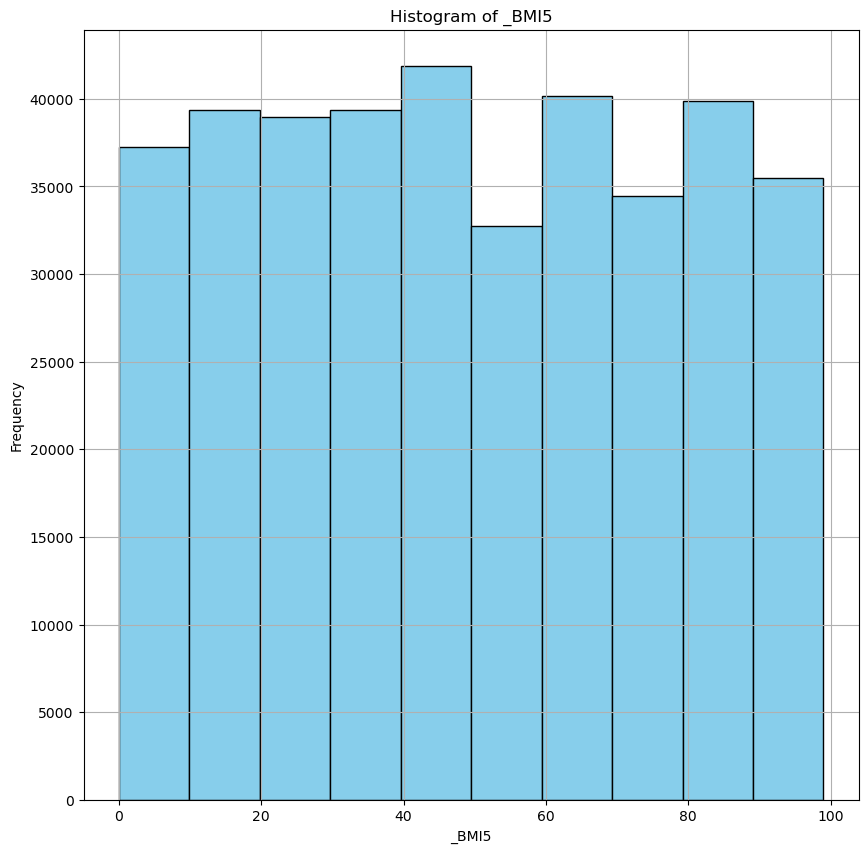

In [66]:
# Plotting Distributions for BMI

import matplotlib.pyplot as plt

column_name = '_BMI5'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name] % 100), bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

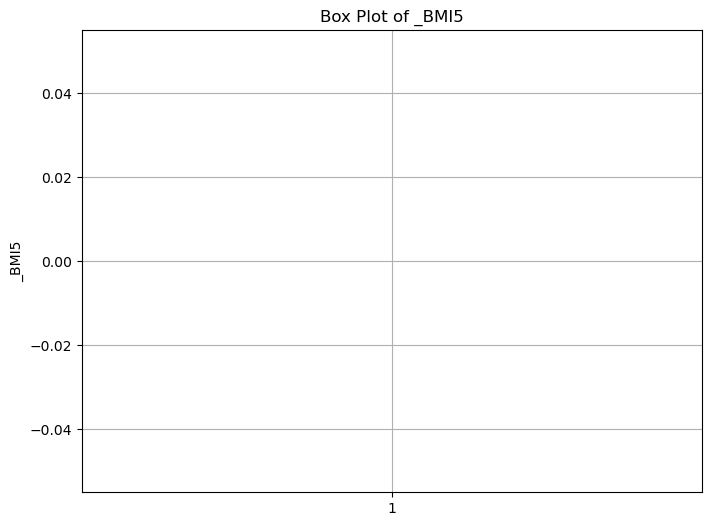

In [67]:
column_name = '_BMI5'

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name])
plt.title('Box Plot of ' + column_name)
plt.ylabel(column_name)
plt.grid(True)
plt.show()

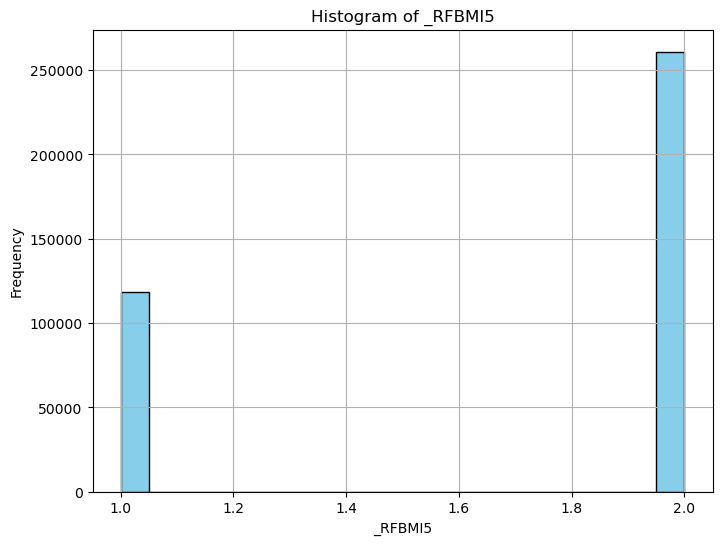

In [68]:
#_BMI5CAT

column_name = '_RFBMI5'


# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df_clean[column_name], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()